In [13]:
import pandas as pd
df = pd.read_csv('dane_wiki_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2439 non-null   int64 
 1   term                  2439 non-null   object
 2   response_gpt3         2439 non-null   object
 3   pos_gpt3              2439 non-null   object
 4   response_gpt4         2439 non-null   object
 5   pos_gpt4              2439 non-null   object
 6   wiki_response_gpt3    2439 non-null   object
 7   wiki_pos_gpt3         2439 non-null   object
 8   wiki_response_gpt4    2439 non-null   object
 9   wiki_pos_gpt4         2439 non-null   object
 10  response_orca         2439 non-null   object
 11  pos_orca              2439 non-null   object
 12  wiki_response_orca    2439 non-null   object
 13  wiki_pos_orca         2439 non-null   object
 14  prompt                2439 non-null   object
 15  response_falcon       2439 non-null   

In [14]:
text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
               "wiki_response_llama3", "wiki_text_y", "sumy", "bart_sum", "text", "wiki_text", "ts_sum", "gensim_sum"]

MAL

Paragraph - Sentence - Word - Syllable - Phoneme

In [15]:
from helpers.TextManipulations import split_text_into_sentences
from helpers.TextManipulations import perform_text_preprocessing
from algorithms.MAL.MAL import create_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_word_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import print_sorted
from algorithms.MAL.MAL import perform_syllable_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_phoneme_split
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import find_A_b_numerically



def perform_mal(paragraphs)-> float:
    #print("Paragraphs")
    #print(paragraphs)
    sentences = [split_text_into_sentences(element) for element in paragraphs]
    #print("Sentences")
    #print(sentences)
    sentences_normalized = [[perform_text_preprocessing(string) for string in inner_list] for inner_list in sentences]
    #print("Sentences Normalized")
    #print(sentences_normalized)
    sentences_dict = create_sentences_length_in_paragraph_dict(sentences_normalized)
    #print("Sentences Dict")
    #print(sentences_dict)
    sentences_dict_split = perform_word_split(sentences_dict)
    #print("sentences_dict_split")
    #print(sentences_dict_split)
    words_dict = create_words_length_in_sentence_dict(sentences_dict_split)
    words_dict.pop(0, None) # remove sentence of length zero if encountered
    #print("words_dict")
    #print(words_dict)
    sentences_dict_split_counted = count_sentences_length_in_paragraph_dict(sentences_dict_split) 
    #print("sentences_dict_split_counted")
    #print(sentences_dict_split_counted)
    sentences_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(sentences_dict_split_counted) 

    # Level 1: Paragraph - Sentence - Word (X_1, Y_1)
    X_1_Y_1 = average_sentences_length_in_paragraph_dict(sentences_dict_split_counted_average_single) 
    # print_sorted(X_1_Y_1)
    # Level 2: Sentence - Word - Syllable (X_2, Y_2)
    words_dict_split = perform_syllable_split(words_dict)
    syllables_dict = create_words_length_in_sentence_dict(words_dict_split) 
    words_dict_split_counted = count_sentences_length_in_paragraph_dict(words_dict_split) 
    words_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(words_dict_split_counted) 
    X_2_Y_2 = average_sentences_length_in_paragraph_dict(words_dict_split_counted_average_single) 
    # print_sorted(X_2_Y_2)
    syllables_dict_split = perform_phoneme_split(syllables_dict)
    syllables_dict_split_counted = count_sentences_length_in_paragraph_dict(syllables_dict_split) 

    # Level 3: Word - Syllable - Phoneme (X_3, Y_3)
    syllables_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(syllables_dict_split_counted) 
    X_3_Y_3 = average_sentences_length_in_paragraph_dict(syllables_dict_split_counted_average_single) 
    #print_sorted(X_3_Y_3)

    a_1, b_1 = find_A_b_numerically(X_1_Y_1)
    # print(b_1)
    a_2, b_2 = find_A_b_numerically(X_2_Y_2)
    # print(b_2)
    a_3, b_3 = find_A_b_numerically(X_3_Y_3)
    # print(b_3)

    D = 3 / (b_1 + b_2 + b_3)
    return D

In [16]:
D_s = [perform_mal(df[column].astype(str).values.flatten().tolist()) for column in text_columns]
print(D_s)

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/MAL/MAL.py:137: RuntimeWarning: overflow encountered in power
  return a * pow(x, -b)


[7.6090192159622205, 6.76625995272176, 4.911992632371854, 4.244441941459315, 5.6335570011316225, 7.773511713796104, 6.183845189391076, 9.121309419021248, 5.693569603008628, 5.2667901241413, 7.80176240945916, 7.730253540615665, 12.157567852578554, 3.064556101024042, 3.1459102629156335, 4.0791008896957335, 4.032073977240007, 4.247138039061979, 13.080920105372005]


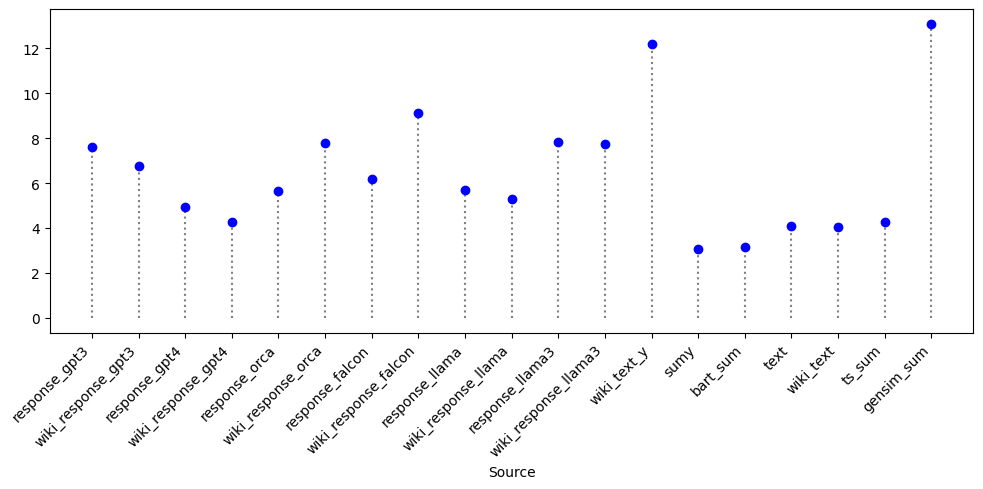

In [17]:
import matplotlib.pyplot as plt

def plot_scatter(D_s, text_coulmns, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(D_s)), D_s, color='blue', zorder=5)

    plt.xticks(range(len(text_coulmns)), text_coulmns, rotation=45, ha="right")

    plt.xlabel('Source')
    
    for i, label in enumerate(text_coulmns):
        plt.vlines(i, ymin=0, ymax=D_s[i], colors='gray', linestyles='dotted')

    plt.tight_layout()
    plt.show()

plot_scatter(D_s, text_columns, 'Fractal dimension for different text sources')

Data with pos to list transformation

In [18]:
pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos", "sumy_pos",
              "bart_pos", "ts_pos", "gensim_pos"]
pos_df = df[pos_columns]
pos_df.info()
# errors in this row - looks like sentence is cut to one word only, list has length 1
pos_df = pos_df.drop(index=1528)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2439 non-null   object
 1   wiki_pos_gpt3    2439 non-null   object
 2   pos_gpt4         2439 non-null   object
 3   wiki_pos_gpt4    2439 non-null   object
 4   pos_orca         2439 non-null   object
 5   wiki_pos_orca    2439 non-null   object
 6   pos_falcon       2439 non-null   object
 7   wiki_pos_falcon  2439 non-null   object
 8   pos_llama        2439 non-null   object
 9   wiki_pos_llama   2439 non-null   object
 10  pos_llama3       2439 non-null   object
 11  wiki_pos_llama3  2439 non-null   object
 12  text_pos         2439 non-null   object
 13  sumy_pos         2439 non-null   object
 14  bart_pos         2439 non-null   object
 15  ts_pos           2439 non-null   object
 16  gensim_pos       2439 non-null   object
dtypes: object(17)
memory usage: 324.1

In [29]:
import ast

# util function to convert list in a cell to python list
def convert_to_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell

pos_df_list = pos_df.applymap(convert_to_list) 
pos_df_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         2438 non-null   object
 1   wiki_pos_gpt3    2438 non-null   object
 2   pos_gpt4         2438 non-null   object
 3   wiki_pos_gpt4    2438 non-null   object
 4   pos_orca         2438 non-null   object
 5   wiki_pos_orca    2438 non-null   object
 6   pos_falcon       2438 non-null   object
 7   wiki_pos_falcon  2438 non-null   object
 8   pos_llama        2438 non-null   object
 9   wiki_pos_llama   2438 non-null   object
 10  pos_llama3       2438 non-null   object
 11  wiki_pos_llama3  2438 non-null   object
 12  text_pos         2438 non-null   object
 13  sumy_pos         2438 non-null   object
 14  bart_pos         2438 non-null   object
 15  ts_pos           2438 non-null   object
 16  gensim_pos       2438 non-null   object
dtypes: object(17)
memory usage: 342.8+ KB


Utility functions

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def box_plot(df, algorithm):
    plt.figure(figsize=(17, 12))
    df.boxplot()
    plt.title('Zakres wartości dla dlanych modeli językowych')
    plt.xlabel('Model językowy')
    plt.ylabel(f'H_{algorithm}')
    plt.xticks(rotation=45)  # Rotate column labels if needed
    plt.show()

DFA (each cell separately)

In [43]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa

def dfa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [22]:
import os

h_df_filename_dfa = 'h_df_dfa.csv'

def load_or_create_h_df_filename_dfa(pos_df_list):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = pos_df_list.applymap(dfa_calculate_cell([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [23]:
h_df_dfa = load_or_create_h_df_filename_dfa(pos_df_list)
h_df_dfa.info()
h_df_dfa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2438 non-null   float64
 1   pos_gpt4         2438 non-null   float64
 2   wiki_pos_gpt3    2438 non-null   float64
 3   wiki_pos_gpt4    2438 non-null   float64
 4   pos_orca         2438 non-null   float64
 5   wiki_pos_orca    2438 non-null   float64
 6   pos_falcon       2438 non-null   float64
 7   wiki_pos_falcon  2438 non-null   float64
 8   pos_llama        2438 non-null   float64
 9   wiki_pos_llama   2438 non-null   float64
 10  pos_llama3       2438 non-null   float64
 11  wiki_pos_llama3  2438 non-null   float64
 12  text_pos         2438 non-null   float64
 13  sumy_pos         2438 non-null   float64
 14  bart_pos         2438 non-null   float64
 15  ts_pos           2438 non-null   float64
 16  gensim_pos       2418 non-null   float64
dtypes: float64(17)

,pos_gpt3,pos_gpt4,wiki_pos_gpt3,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,0.354021,0.635437,0.633284,0.491603,0.240059,0.110751,0.355088,0.331124,0.179232,0.179254,0.359906,0.404237,0.866769,0.866769,7.873645e-31,0.226590,5.686829e-01
1,0.089048,0.347049,0.402495,0.341977,0.281893,0.305777,0.688693,0.602627,0.510504,0.496236,0.154053,0.398055,0.112927,0.279996,2.433672e-30,0.422623,7.873645e-31
2,0.680489,0.194552,0.231595,0.600395,0.223089,0.057093,0.557703,0.403434,0.214064,0.238019,0.247006,0.557842,0.751765,0.729068,5.967012e-01,0.587501,7.626991e-01
3,0.352236,0.292583,0.308869,0.422600,0.251151,0.261956,0.282820,0.193660,0.515337,0.325556,0.311325,0.364961,0.625865,0.607379,-7.873645e-31,0.400503,3.752532e-01
4,0.362998,0.286208,0.237564,0.361953,0.670626,0.690680,0.102260,0.393400,0.659647,0.057493,0.214821,0.452594,0.761817,0.770095,-7.873645e-31,0.770701,NaN


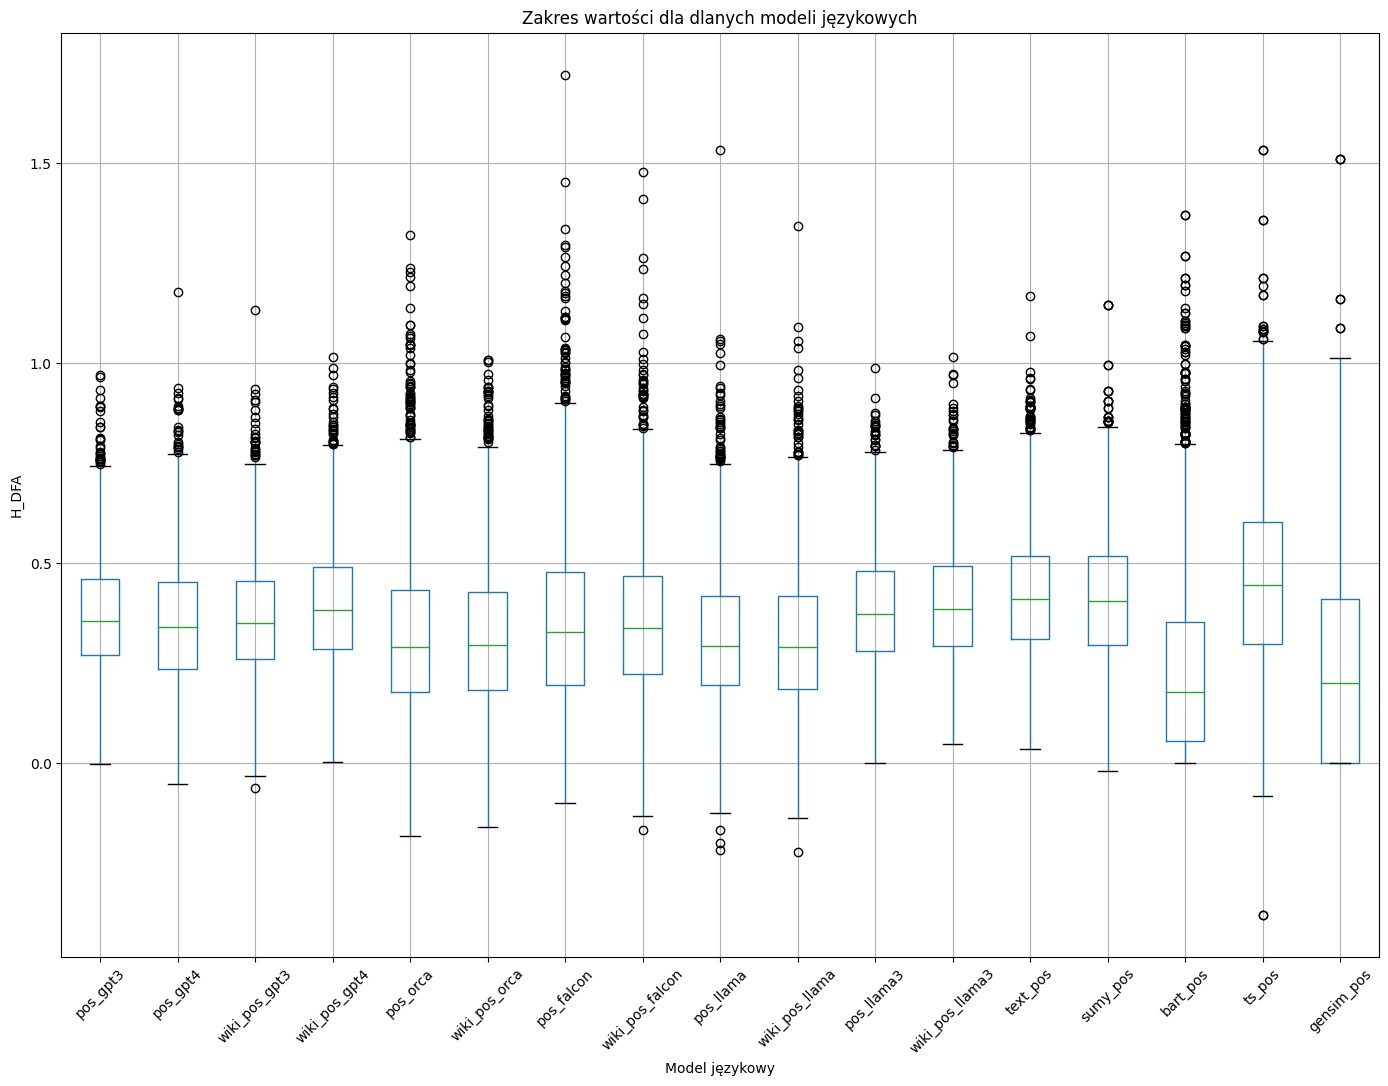

In [24]:
box_plot(h_df_dfa, 'DFA')

AFA

In [60]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa

def afa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [35]:
import os

h_df_filename_afa = 'h_df_afa.csv'

def load_or_create_h_df_filename_afa(pos_df_list):
    if os.path.exists(h_df_filename_afa):
        h_df = pd.read_csv(h_df_filename_afa)
    else:
        h_df = pos_df_list.applymap(afa_calculate_cell)   
        h_df.to_csv(h_df_filename_afa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [36]:
h_df_afa = load_or_create_h_df_filename_afa(pos_df_list)
h_df_afa.info()
h_df_afa.head()

/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magdalena/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scal

Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
Cell [] has been evaluated to list length 0
DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2438
Data columns (

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,0.614927,0.396066,0.486061,0.522380,0.170100,0.644018,NaN,NaN,0.215098,0.243720,0.324166,0.441934,0.596219,0.596219,NaN,0.554563,0.644269
1,0.375543,0.339083,0.600925,0.227006,0.628562,0.222095,NaN,0.355979,0.710041,0.244816,0.097358,0.252208,0.348992,0.385629,NaN,0.030174,NaN
2,0.537489,0.205241,0.307261,0.416025,0.310674,0.914661,NaN,0.315071,0.438636,0.711003,0.149806,0.403588,0.627323,0.657107,NaN,0.382685,NaN
3,0.346516,0.423300,0.395675,0.269973,0.292757,0.482089,NaN,0.551851,0.538883,0.134894,0.180132,0.233841,0.319609,0.409804,NaN,0.059932,0.207549
4,0.188114,0.162512,0.239140,0.403727,NaN,0.385218,NaN,NaN,0.516277,0.410743,0.273414,0.759629,NaN,NaN,NaN,0.475872,NaN


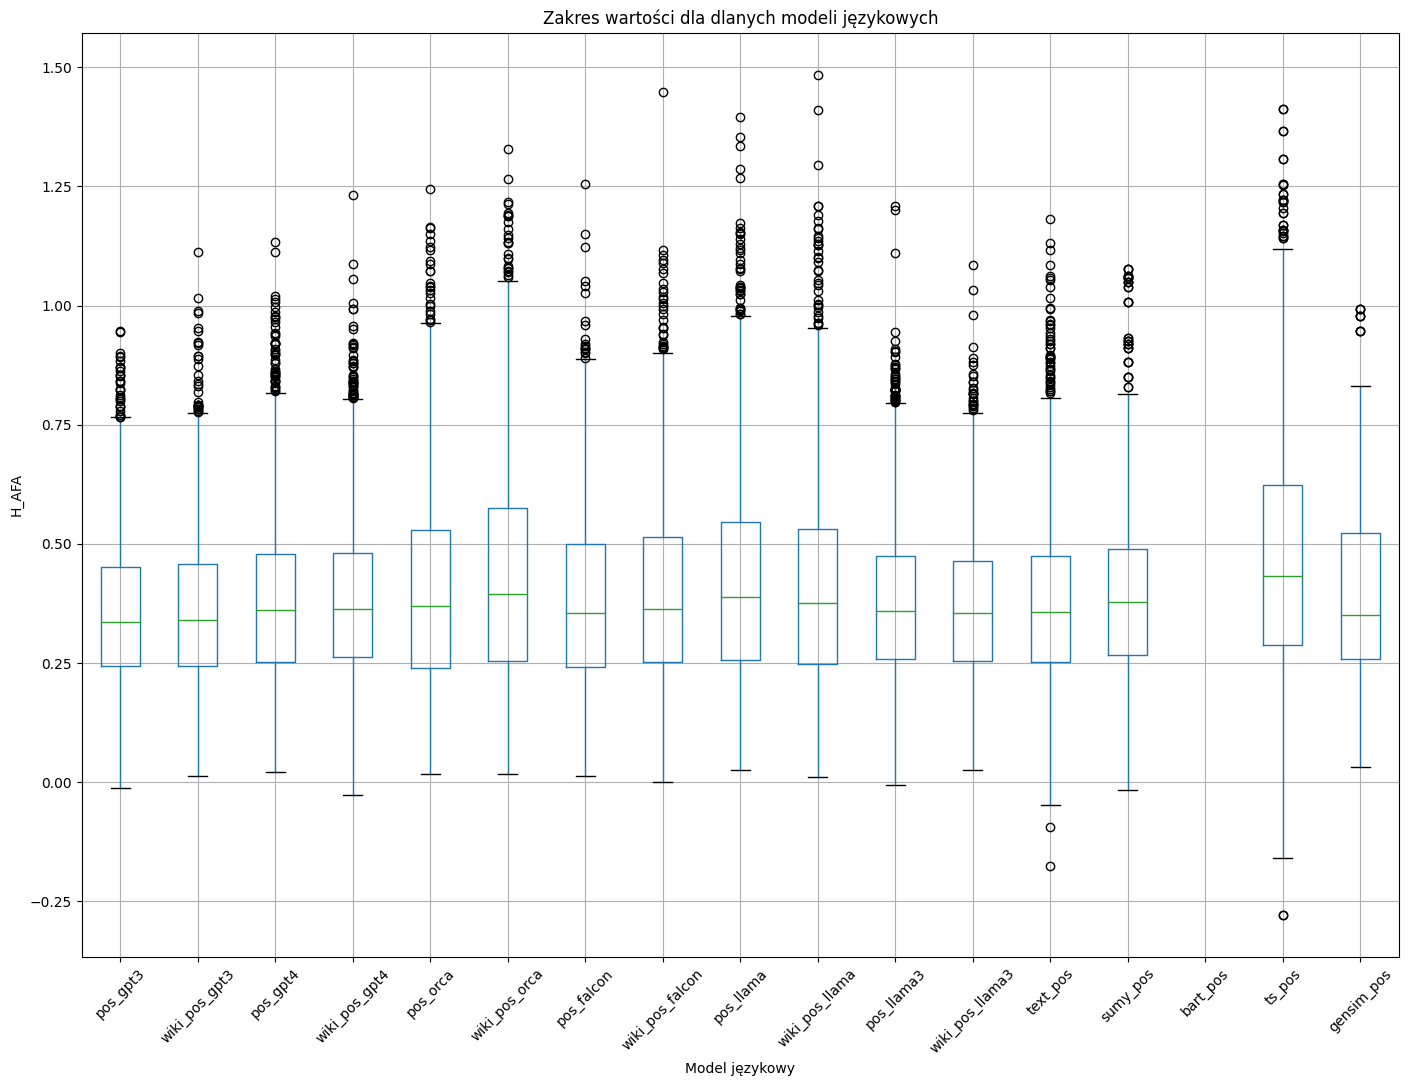

In [37]:
box_plot(h_df_afa, 'AFA')

RRA

In [38]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra

def rra_calculate_cell(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    ts_normalized = normalize(cell)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [39]:
h_df_filename_rra = 'h_df_rra.csv'

def load_or_create_h_df_filename_rra(pos_df_list):
    if os.path.exists(h_df_filename_rra):
        h_df = pd.read_csv(h_df_filename_rra)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [40]:
h_df_rra = load_or_create_h_df_filename_rra(pos_df_list)
h_df_rra.info()
h_df_rra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         2383 non-null   float64
 1   pos_gpt4         2417 non-null   float64
 2   wiki_pos_gpt3    2382 non-null   float64
 3   wiki_pos_gpt4    2415 non-null   float64
 4   pos_orca         2353 non-null   float64
 5   wiki_pos_orca    2280 non-null   float64
 6   pos_falcon       2395 non-null   float64
 7   wiki_pos_falcon  2407 non-null   float64
 8   pos_llama        2317 non-null   float64
 9   wiki_pos_llama   2302 non-null   float64
 10  pos_llama3       2404 non-null   float64
 11  wiki_pos_llama3  2335 non-null   float64
 12  text_pos         2214 non-null   float64
 13  sumy_pos         2246 non-null   float64
 14  bart_pos         2374 non-null   float64
 15  ts_pos           1863 non-null   float64
 16  gensim_pos       2359 non-null   float64
dtypes: float64(17)

,pos_gpt3,pos_gpt4,wiki_pos_gpt3,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,0.568857,0.648996,0.625814,0.445265,0.577301,NaN,0.574087,0.670758,0.462178,0.533370,0.615364,0.642561,0.574153,0.574153,0.780939,0.587375,0.618909
1,0.513762,0.585142,0.454937,0.487270,0.706383,0.619046,0.644570,0.590531,0.619429,0.660133,0.505824,0.502387,0.530692,0.548778,0.667083,0.761232,0.425842
2,0.625112,0.616498,0.475646,0.551816,0.608498,NaN,0.632380,0.579613,0.614589,0.679210,0.525707,0.487209,NaN,NaN,0.731614,0.759340,0.808873
3,0.542602,0.631895,0.506067,0.608186,0.517663,0.553370,0.584186,0.622216,0.651382,0.449492,0.549626,0.597593,0.615652,0.502305,0.533181,0.780250,0.627242
4,0.517482,0.547695,0.525610,0.507761,0.653373,0.582894,0.580850,0.479076,0.557255,0.606849,0.500859,0.608339,0.714955,0.726760,0.846917,0.616019,NaN


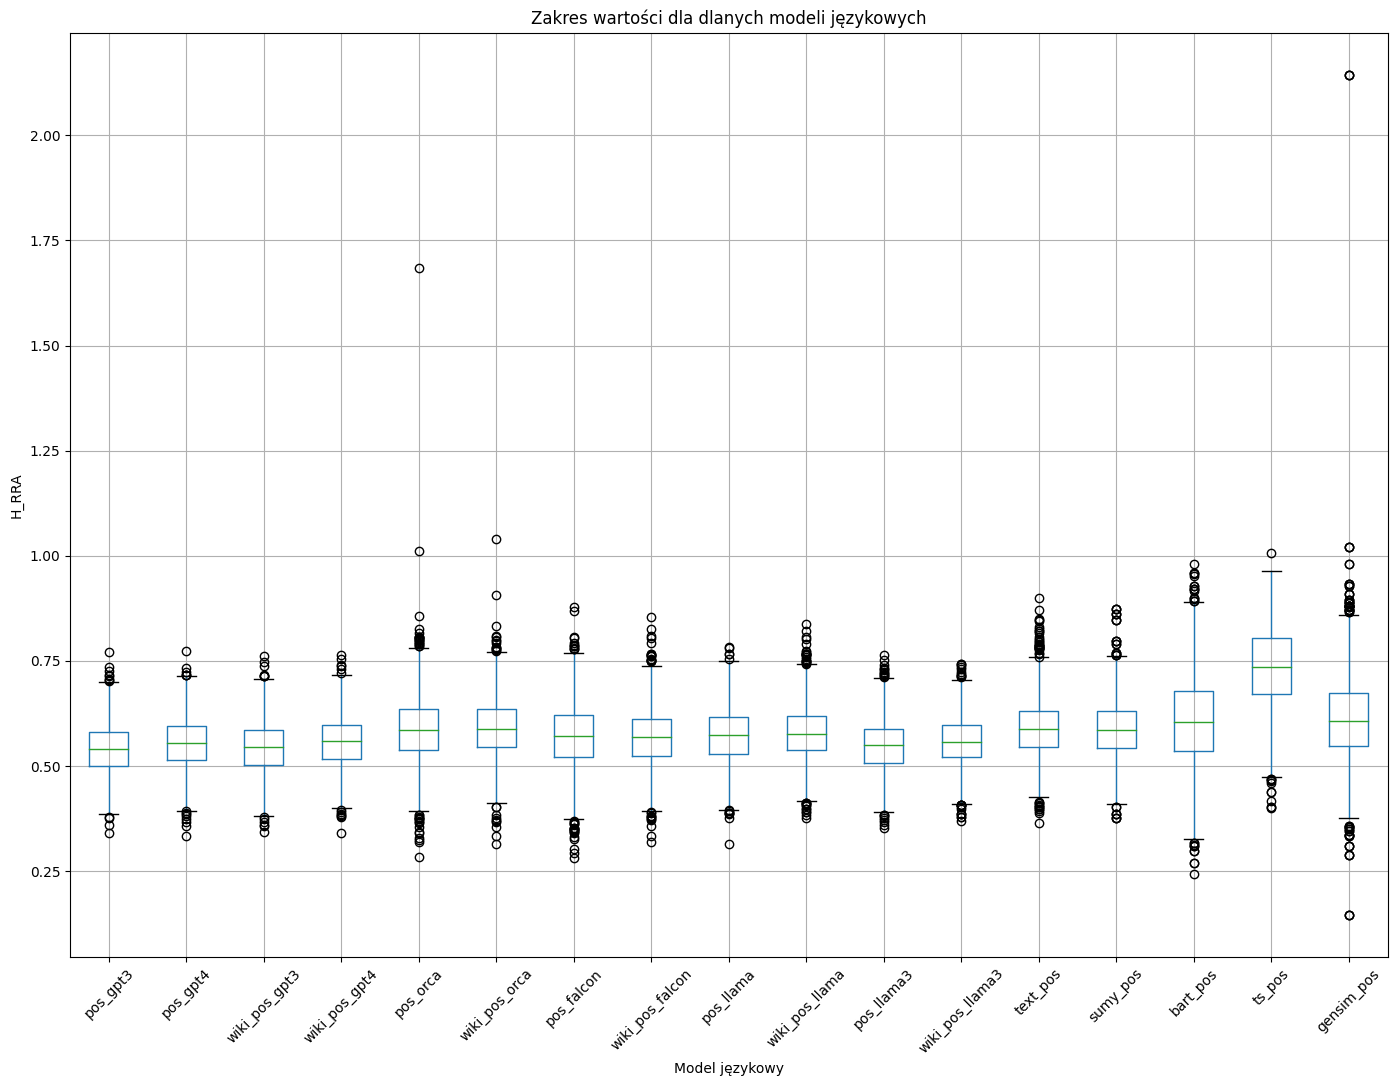

In [41]:
box_plot(h_df_rra, 'RRA')

Same as above but on combined cells

DFA

In [42]:
def merge_lists(pos_df_list):
    pos_df_list_combined = pd.DataFrame()
    for col in pos_df_list.columns:
        temp = []
        for cell_value in pos_df_list[col]:
            temp.extend(cell_value)
        pos_df_list_combined[col] = [temp]
    return pos_df_list_combined
        
pos_df_list_combined = merge_lists(pos_df_list)
pos_df_list_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pos_gpt3         1 non-null      object
 1   wiki_pos_gpt3    1 non-null      object
 2   pos_gpt4         1 non-null      object
 3   wiki_pos_gpt4    1 non-null      object
 4   pos_orca         1 non-null      object
 5   wiki_pos_orca    1 non-null      object
 6   pos_falcon       1 non-null      object
 7   wiki_pos_falcon  1 non-null      object
 8   pos_llama        1 non-null      object
 9   wiki_pos_llama   1 non-null      object
 10  pos_llama3       1 non-null      object
 11  wiki_pos_llama3  1 non-null      object
 12  text_pos         1 non-null      object
 13  sumy_pos         1 non-null      object
 14  bart_pos         1 non-null      object
 15  ts_pos           1 non-null      object
 16  gensim_pos       1 non-null      object
dtypes: object(17)
memory usage: 264.0+ byte

In [57]:
h_df_filename_dfa_combined = 'h_df_dfa_combined.csv'

def load_or_create_h_df_filename_dfa_combined(pos_df_list):
    if os.path.exists(h_df_filename_dfa_combined):
        h_df = pd.read_csv(h_df_filename_dfa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_dfa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [58]:
h_df_dfa_combined = load_or_create_h_df_filename_dfa_combined(pos_df_list_combined)
h_df_dfa_combined.info()
h_df_dfa_combined.head()

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  sumy_pos         1 non-null      float64
 14  bart_pos         1 non-null      float64
 15  ts_pos           1 non-null      float64
 16  gensim_pos       1 non-null  

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,0.526773,0.532046,0.530236,0.545809,0.558871,0.56274,0.564194,0.5772,0.549374,0.555845,0.537951,0.552613,0.653857,0.648809,0.561092,0.837725,0.598791


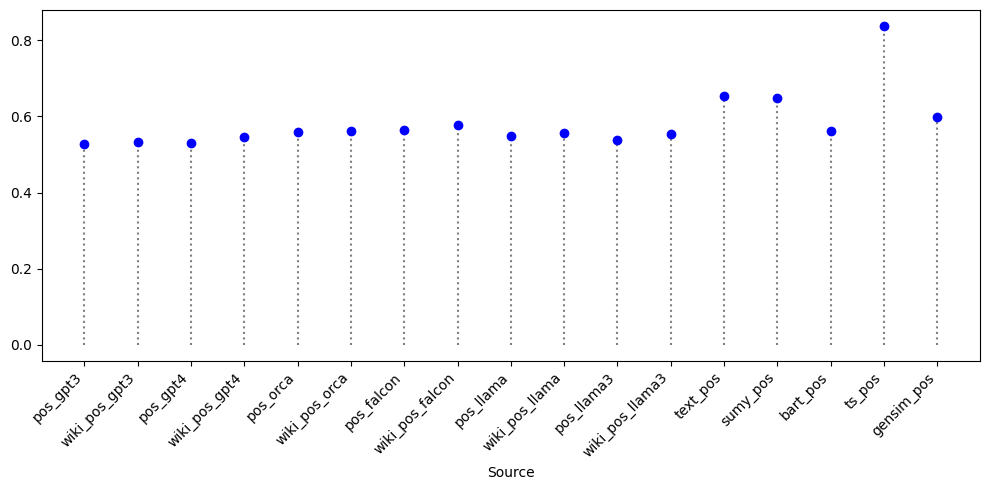

In [59]:
plot_scatter(h_df_dfa_combined.values.flatten().tolist(), pos_columns, 'DFA Hurst exponent for different text sources, combined input')

AFA

In [70]:
h_df_filename_afa_combined = 'h_df_afa_combined.csv'

def load_or_create_h_df_filename_afa_combined(pos_df_list):
    if os.path.exists(h_df_filename_afa_combined):
        h_df = pd.read_csv(h_df_filename_afa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 750, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_afa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [71]:
h_df_afa_combined = load_or_create_h_df_filename_afa_combined(pos_df_list_combined)
h_df_afa_combined.info()
h_df_afa_combined.head()

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         1 non-null      float64
 1   wiki_pos_gpt3    1 non-null      float64
 2   pos_gpt4         1 non-null      float64
 3   wiki_pos_gpt4    1 non-null      float64
 4   pos_orca         1 non-null      float64
 5   wiki_pos_orca    1 non-null      float64
 6   pos_falcon       1 non-null      float64
 7   wiki_pos_falcon  1 non-null      float64
 8   pos_llama        1 non-null      float64
 9   wiki_pos_llama   1 non-null      float64
 10  pos_llama3       1 non-null      float64
 11  wiki_pos_llama3  1 non-null      float64
 12  text_pos         1 non-null      float64
 13  sumy_pos         1 non-null      float64
 14  bart_pos         1 non-null      float64
 15  ts_pos           1 non-null      float64
 16  gensim_pos       1 non-null  

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,0.550915,0.554715,0.548271,0.563902,0.565994,0.569691,0.579708,0.596211,0.560389,0.571475,0.557569,0.580505,0.68399,0.677748,0.560635,0.810789,0.600161


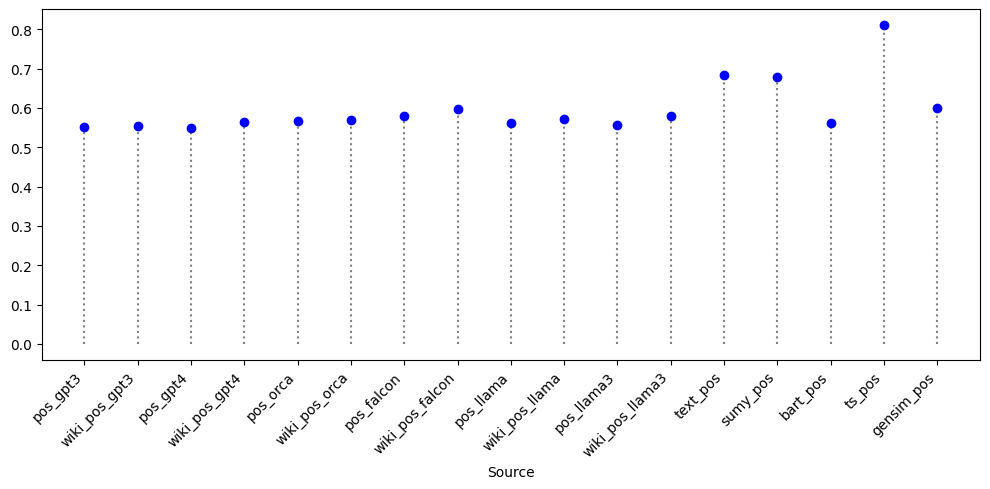

In [72]:
plot_scatter(h_df_afa_combined.values.flatten().tolist(), pos_columns, 'AFA Hurst exponent for different text sources, combined input')

RRA

In [76]:
h_df_filename_rra_combined = 'h_df_rra_combined.csv'

def load_or_create_h_df_filename_rra_combined(pos_df_list):
    if os.path.exists(h_df_filename_rra_combined):
        h_df = pd.read_csv(h_df_filename_rra_combined)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [77]:
h_df_rra_combined = load_or_create_h_df_filename_rra_combined(pos_df_list_combined)
h_df_rra_combined.info()
h_df_rra_combined.head()

/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/RRA/RRA.py:142: RuntimeWarning: invalid value encountered in double_scalars
  ratios_per_s.append(r_t_s / (np.sqrt(variance_squared)))
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/RRA/RRA.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  ratios_per_s.append(r_t_s / (np.sqrt(variance_squared)))
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/RRA/RRA.py:142: RuntimeWarning: invalid value encountered in double_scalars
  ratios_per_s.append(r_t_s / (np.sqrt(variance_squared)))
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal/algorithms/RRA/RRA.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  ratios_per_s.append(r_t_s / (np.sqrt(variance_squared)))
/home/magdalena/Informatyka-Stosowana/Praca magisterska/implementacje/repo/fractal

DataFrame created and saved to file.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pos_gpt3         0 non-null      float64
 1   wiki_pos_gpt3    0 non-null      float64
 2   pos_gpt4         0 non-null      float64
 3   wiki_pos_gpt4    0 non-null      float64
 4   pos_orca         0 non-null      float64
 5   wiki_pos_orca    0 non-null      float64
 6   pos_falcon       0 non-null      float64
 7   wiki_pos_falcon  0 non-null      float64
 8   pos_llama        0 non-null      float64
 9   wiki_pos_llama   0 non-null      float64
 10  pos_llama3       0 non-null      float64
 11  wiki_pos_llama3  0 non-null      float64
 12  text_pos         0 non-null      float64
 13  sumy_pos         0 non-null      float64
 14  bart_pos         0 non-null      float64
 15  ts_pos           0 non-null      float64
 16  gensim_pos       0 non-null  

,pos_gpt3,wiki_pos_gpt3,pos_gpt4,wiki_pos_gpt4,pos_orca,wiki_pos_orca,pos_falcon,wiki_pos_falcon,pos_llama,wiki_pos_llama,pos_llama3,wiki_pos_llama3,text_pos,sumy_pos,bart_pos,ts_pos,gensim_pos
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
plot_scatter(h_df_rra_combined, pos_columns, 'Hurst exponent for different text sources, combined input')

NameError: name 'h_df_rra_combined' is not defined